In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("C:/Users/SRISTI/Desktop/practice text doc/abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Meat weight,Gut weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## EDA

In [4]:
ds=data.copy()  # making a copy of data so that could not lost data by mistake

In [5]:
ds.shape

(4177, 9)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           4177 non-null   object 
 1   Length        4177 non-null   float64
 2   Diameter      4177 non-null   float64
 3   Height        4177 non-null   float64
 4   Whole weight  4177 non-null   float64
 5   Meat weight   4177 non-null   float64
 6   Gut weight    4177 non-null   float64
 7   Shell weight  4177 non-null   float64
 8   Rings         4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
ds.dtypes

Sex              object
Length          float64
Diameter        float64
Height          float64
Whole weight    float64
Meat weight     float64
Gut weight      float64
Shell weight    float64
Rings             int64
dtype: object

In [8]:
ds.isnull().sum()

Sex             0
Length          0
Diameter        0
Height          0
Whole weight    0
Meat weight     0
Gut weight      0
Shell weight    0
Rings           0
dtype: int64

In [9]:
ds.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [10]:
ds.Rings.value_counts(ascending=True)

29      1
26      1
2       1
25      1
1       1
27      2
24      2
22      6
23      9
21     14
3      15
20     26
19     32
18     42
4      57
17     58
16     67
15    103
5     115
14    126
13    203
6     259
12    267
7     391
11    487
8     568
10    634
9     689
Name: Rings, dtype: int64

In [11]:
ds.describe()

,Length,Diameter,Height,Whole weight,Meat weight,Gut weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
ds['Sex']=le.fit_transform(ds['Sex'])

In [15]:
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Meat weight,Gut weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Univariate Analysis

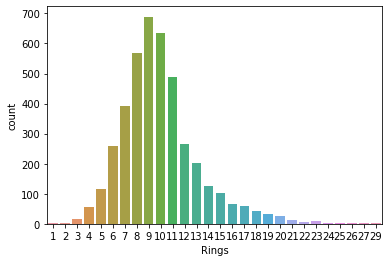

In [16]:
sns.countplot(ds['Rings'])

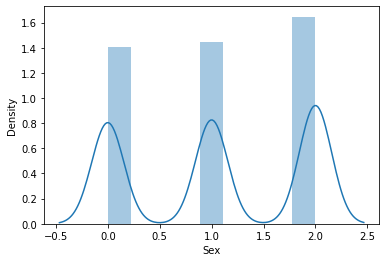

In [17]:
sns.distplot(ds['Sex'])

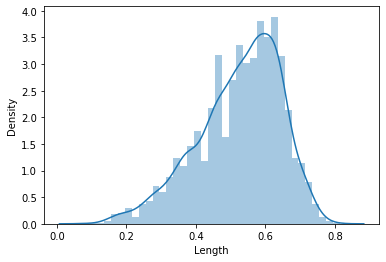

In [18]:
sns.distplot(ds['Length'])

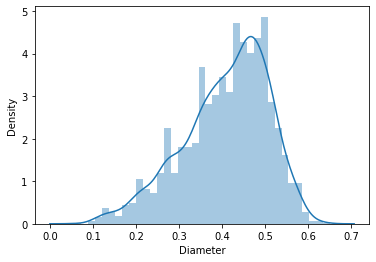

In [19]:
sns.distplot(ds['Diameter'])

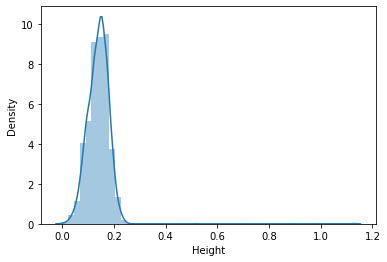

In [20]:
sns.distplot(ds['Height'])

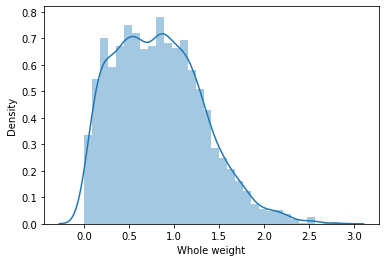

In [21]:
sns.distplot(ds['Whole weight'])

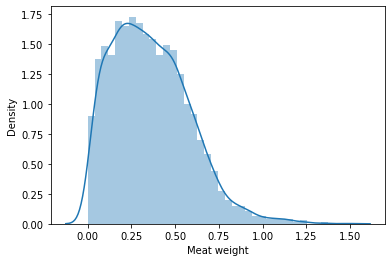

In [22]:
sns.distplot(ds['Meat weight'])

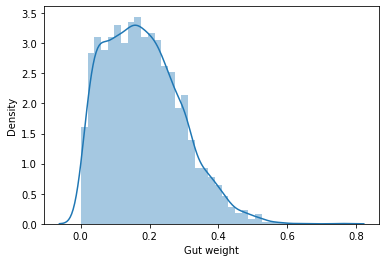

In [23]:
sns.distplot(ds['Gut weight'])

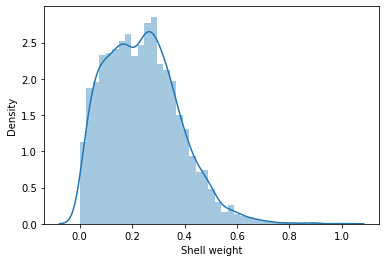

In [24]:
sns.distplot(ds['Shell weight'])

### Bivariate Analysis

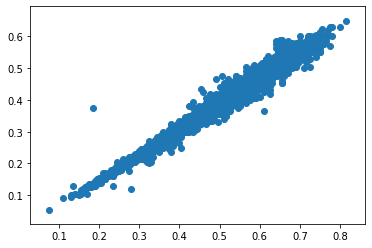

In [25]:
plt.scatter(ds['Length'],ds['Diameter'])
plt.show()

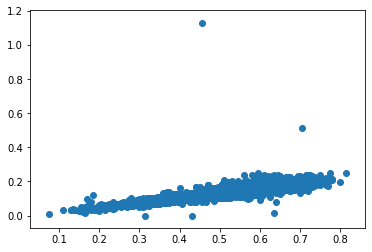

In [26]:
plt.scatter(ds['Length'],ds['Height'])
plt.show()

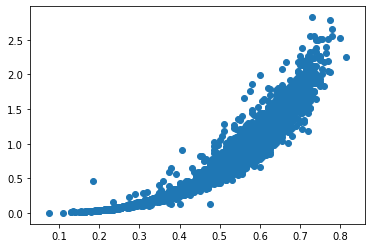

In [27]:
plt.scatter(ds['Length'],ds['Whole weight'])
plt.show()

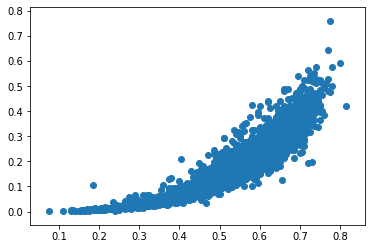

In [28]:
plt.scatter(ds['Length'],ds['Gut weight'])
plt.show()

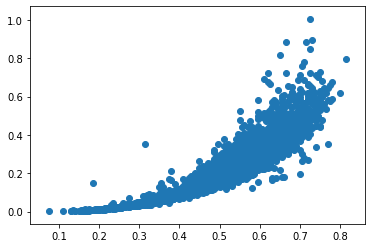

In [29]:
plt.scatter(ds['Length'],ds['Shell weight'])
plt.show()

### Multivariate Analysis

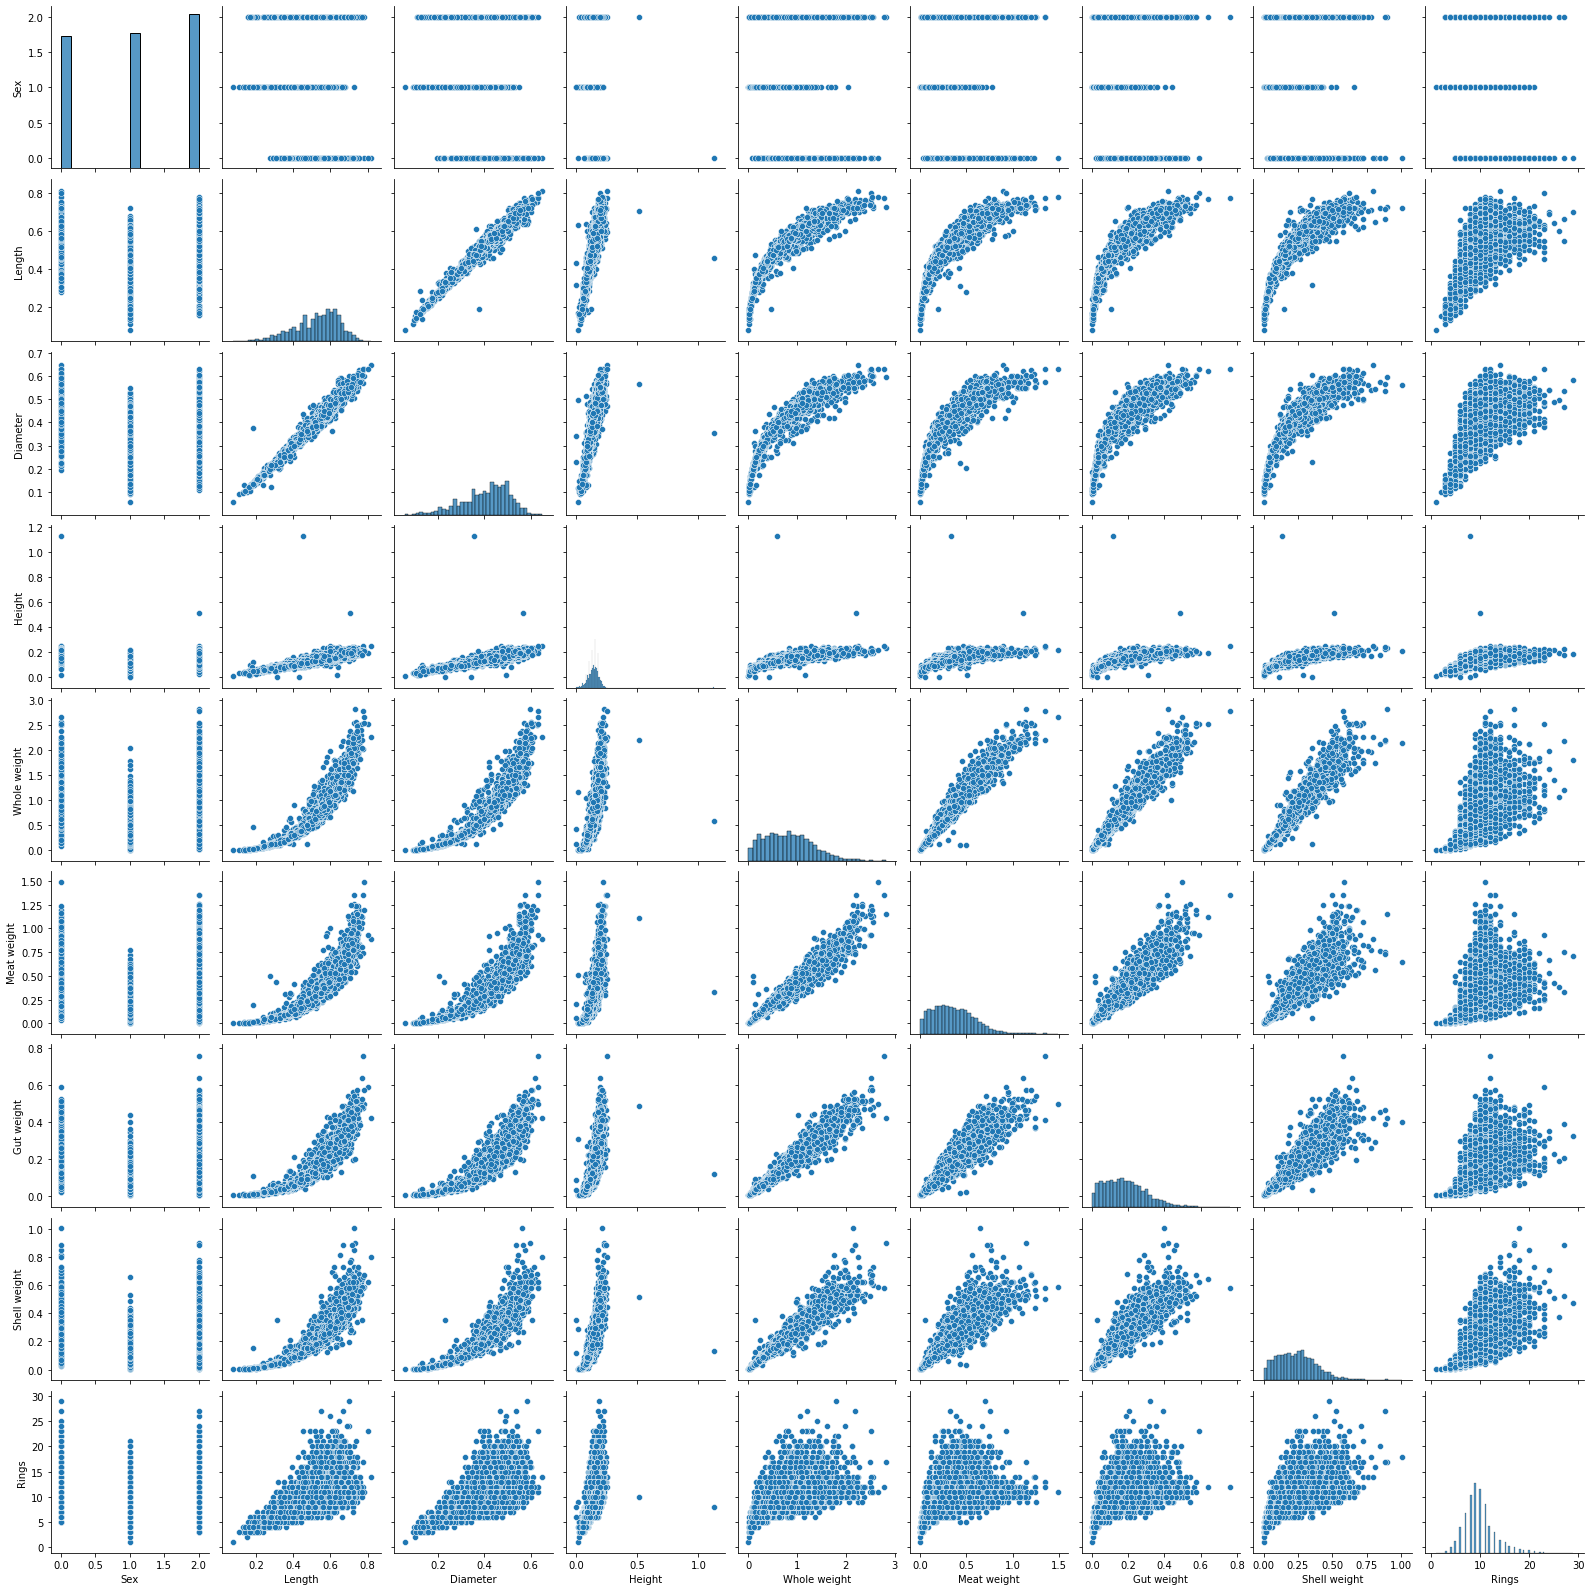

In [30]:
sns.pairplot(ds)

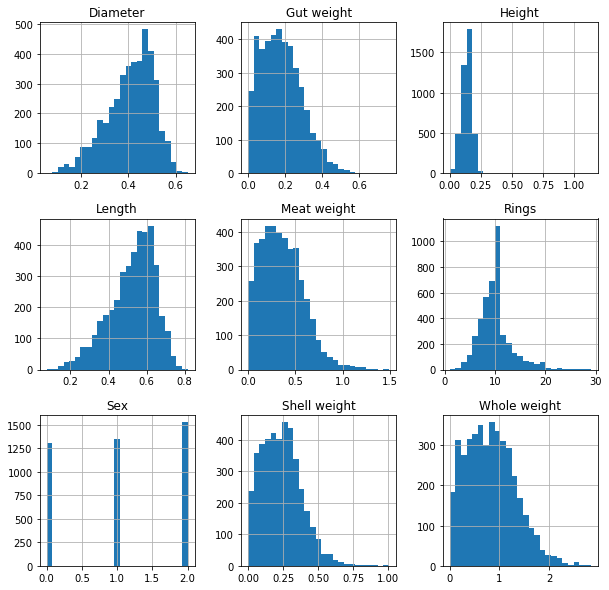

In [31]:
ds.hist(bins=25,figsize=(10,10))
plt.show()

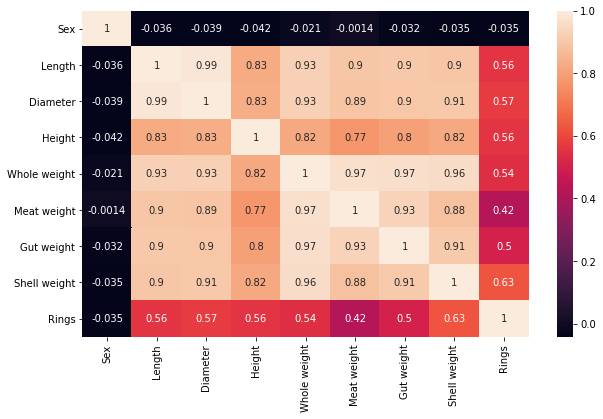

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(ds.corr(),annot=True)

### Checking for outliers

In [33]:
ds1=ds.copy()

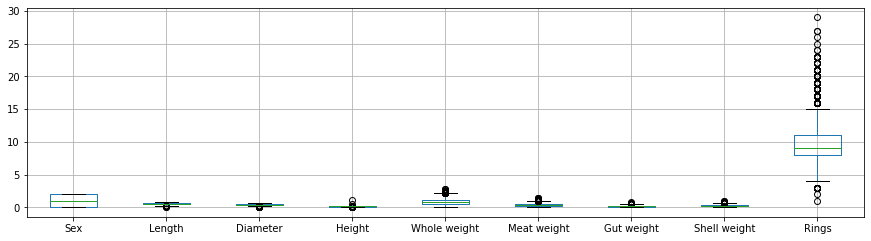

In [34]:
ds1.boxplot(figsize=[15,5])
plt.subplots_adjust(bottom=.30)
plt.show()

In [35]:
from scipy.stats import zscore

In [36]:
z=np.abs(zscore(ds1))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [37]:
ds1_new=ds1[(z<3).all(axis=1)]
ds1_new

,Sex,Length,Diameter,Height,Whole weight,Meat weight,Gut weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [38]:
ds1_new.shape

(4027, 9)

In [39]:
ds1.shape

(4177, 9)

In [40]:
((4177-4027)/4177)*100

3.5910940866650707

In [41]:
ds1_new.Rings.unique()

array([15,  7,  9, 10,  8, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 17,  3],
      dtype=int64)

In [42]:
ds1

,Sex,Length,Diameter,Height,Whole weight,Meat weight,Gut weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Checking for skewness

In [43]:
ds1.skew()

Sex            -0.098155
Length         -0.639873
Diameter       -0.609198
Height          3.128817
Whole weight    0.530959
Meat weight     0.719098
Gut weight      0.591852
Shell weight    0.620927
Rings           1.114102
dtype: float64

In [44]:
ds2=ds1.drop(columns=['Sex','Rings'],axis=1)        # these two columns are categorical columns so we can not apply removal of skewness 

In [45]:
ds2.head()

,Length,Diameter,Height,Whole weight,Meat weight,Gut weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [46]:
from sklearn.preprocessing import PowerTransformer

In [47]:
pt=PowerTransformer(method='yeo-johnson',standardize=True)
ds2[ds2.columns]=pt.fit_transform(ds2[ds2.columns])

In [48]:
ds2.skew()

Length         -0.066669
Diameter       -0.065977
Height         -0.115483
Whole weight   -0.003980
Meat weight     0.027351
Gut weight      0.039780
Shell weight    0.023390
dtype: float64

In [49]:
ds2

,Length,Diameter,Height,Whole weight,Meat weight,Gut weight,Shell weight
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...
4172,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


In [50]:
ds3=pd.concat([ds2,ds1['Sex']],axis=1)

In [51]:
ds3

,Length,Diameter,Height,Whole weight,Meat weight,Gut weight,Shell weight,Sex
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,2
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,2
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,0
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,2
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,1
...,...,...,...,...,...,...,...,...
4172,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,0
4173,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,2
4174,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,2
4175,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,0


### Splitting the data into training and testing

In [52]:
x=ds3.copy()

In [53]:
x.shape

(4177, 8)

In [54]:
y=ds1.iloc[:,-1]

In [55]:
y.shape

(4177,)

In [56]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

### Finding the best random state

In [57]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_sc=r2_score(y_test,pred)
    if acc_sc>maxacc:
        maxacc=acc_sc
        maxrs=i
print('best acc_sc is:',maxacc,' at random state', maxrs)

best acc_sc is: 0.5952232003940565  at random state 37


In [58]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=37)

In [60]:
x_train.shape

(3258, 8)

In [61]:
y_train.shape

(3258,)

In [62]:
x_test.shape

(919, 8)

In [63]:
y_test.shape

(919,)

In [64]:
lg=LinearRegression()

In [65]:
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
rsc=r2_score(y_test,predlg)
print(rsc)
crsc=cross_val_score(lg,x,y,cv=5)
print(crsc.mean())

0.5952232003940565
0.4370474885217039


### Hyperparameter Tunning with GridSeacrhCV

In [66]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [67]:
# for lasso

parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
gcv=GridSearchCV(ls,parameter)
gcv.fit(x_train,y_train)
print(gcv.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [68]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print(r2_score(y_test,predls))
crsc=cross_val_score(ls,x,y,cv=5)
print(crsc.mean())

0.5951094775681102
0.437408381026525


In [69]:
# for ridge

parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
rg=Ridge()
gcv=GridSearchCV(rg,parameter)
gcv.fit(x_train,y_train)
print(gcv.best_params_)

{'alpha': 1, 'random_state': 0}


In [70]:
rg=Ridge(alpha=1,random_state=0)
rg.fit(x_train,y_train)
predrg=rg.predict(x_test)
print(r2_score(y_test,predrg))
crsc=cross_val_score(rg,x,y,cv=5)
print(crsc.mean())

0.5946675630366027
0.4377371481813831


In [71]:
# for ElasticNet

es=ElasticNet()
gcv=GridSearchCV(es,parameter)
gcv.fit(x_train,y_train)
print(gcv.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [72]:
es=ElasticNet(alpha=0.001,random_state=0)
es.fit(x_train,y_train)
predes=es.predict(x_test)
print(r2_score(y_test,predes))
crsc=cross_val_score(es,x,y,cv=5)
print(crsc.mean())

0.5942059878023116
0.43814855710170936


In [73]:
# for random forest classifier

parameter={'n_estimators':(100,150,200),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
rf=RandomForestClassifier()
gcv=GridSearchCV(rf,parameter)
gcv.fit(x_train,y_train)
print(gcv.best_params_)


{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}


In [74]:
rf=RandomForestClassifier(criterion='gini',n_estimators=200,max_features='sqrt')
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
csrc=cross_val_score(rf,x,y,cv=5)
print(csrc.mean())

0.2676822633297062
0.24707446351316506


### Final model plot

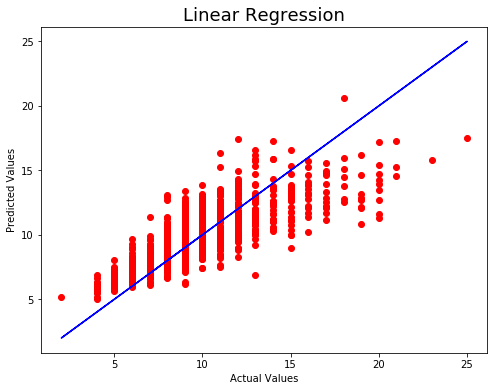

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predlg,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Linear Regression",fontsize=18)
plt.show()

### Saving the model

In [77]:
import joblib

In [78]:
joblib.dump(lg,'abalone_lg.obj')

['abalone_lg.obj']